#### PCA, Hierarchical clustering and plotting
In this notebook, we performed a pca dimension reduction, continued with a hierarchical clustering and plotted the results for different datasets.

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import data_exploration as de
import data_cleanup as dc
import scipy.stats as stats

In [2]:
aa = pd.read_csv('../DMS_data/aminoacids.csv')
gia_null_eto: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv')

#Data cleaning
norm_frame_p53 = dc.aufteilung_mut_pos(dc.norm(gia_null_eto))
cleaned_aa = dc.clean_aa(aa)

In [3]:
dist_chem = de.aa_distance_matrix(aa)

dist_p53 = de.dms_distance_matrix(norm_frame_p53)
mean_subs_p53 = dc.rmv_na(de.mean_substitutions(norm_frame_p53))

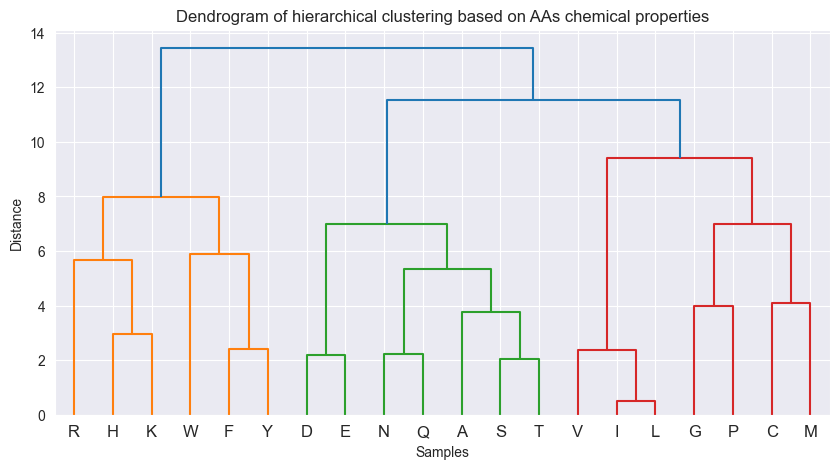

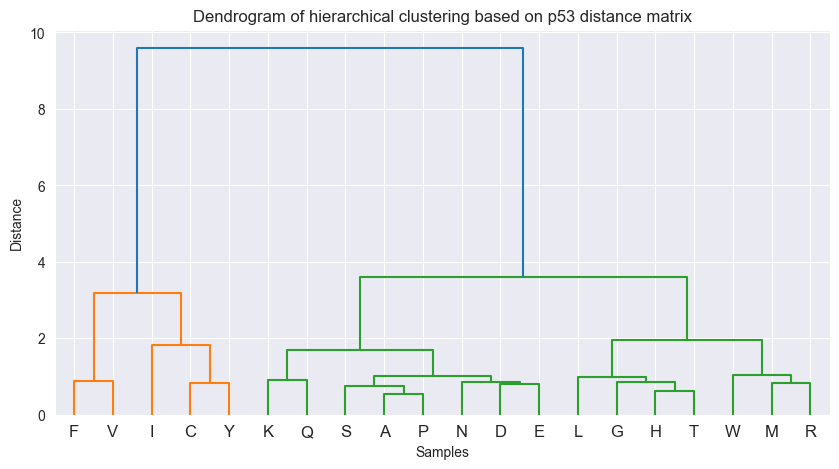

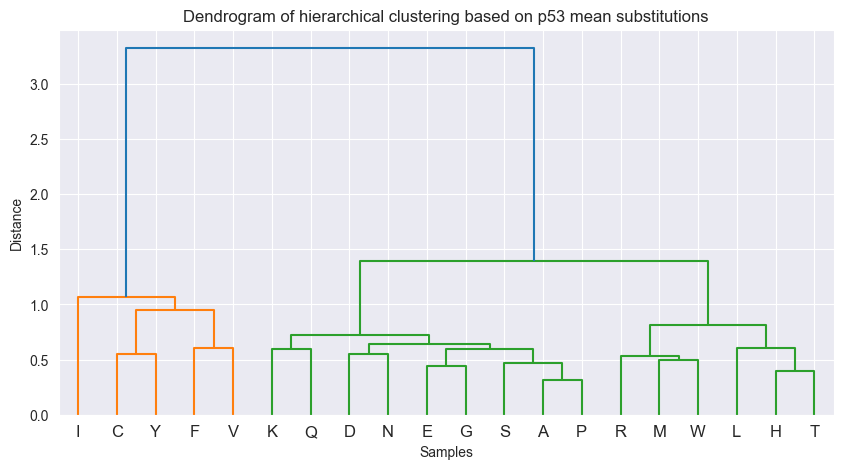

In [4]:
de.plot_hier_clust(dist_chem, title = "AAs chemical properties")

de.plot_hier_clust(dist_p53, title = "p53 distance matrix")
de.plot_hier_clust(mean_subs_p53, title = "p53 mean substitutions")

In [5]:
clusters_by_sil_chem = de.determine_clusters_silhouette(dc.clean_aa(aa))

clusters_by_sil_p53 = de.determine_clusters_silhouette(dc.rmv_na(dc.df_transform(norm_frame_p53)))
clusters_by_sil_mean_p53 = de.determine_clusters_silhouette(mean_subs_p53)

print (clusters_by_sil_chem)
print ("---")
print (clusters_by_sil_p53)
print (clusters_by_sil_mean_p53)

4
---
6
2


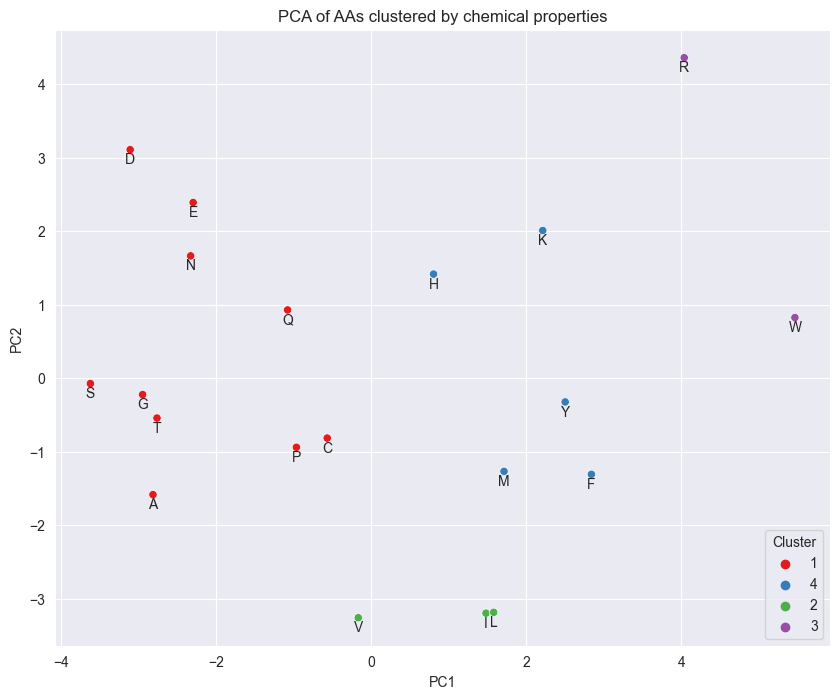

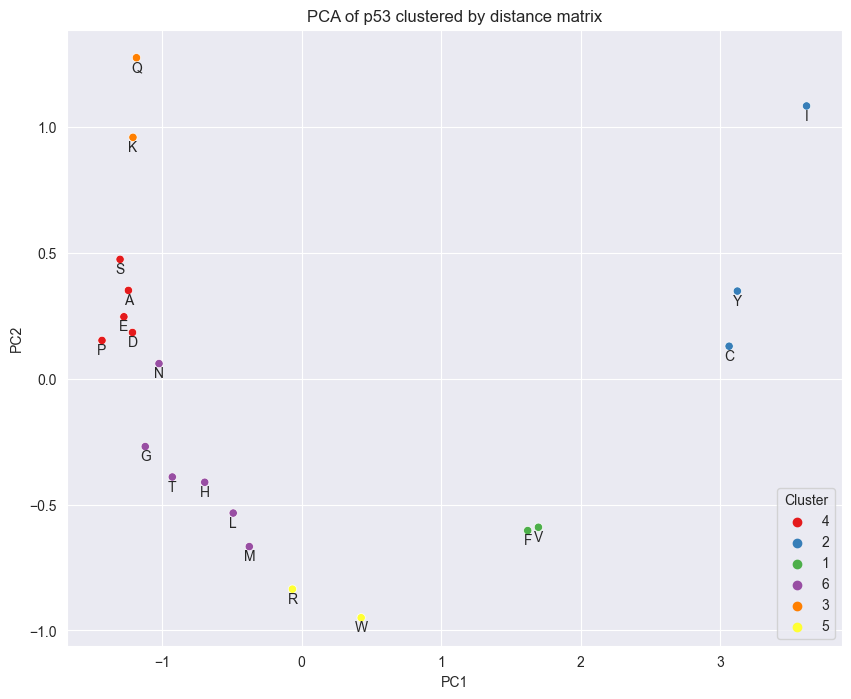

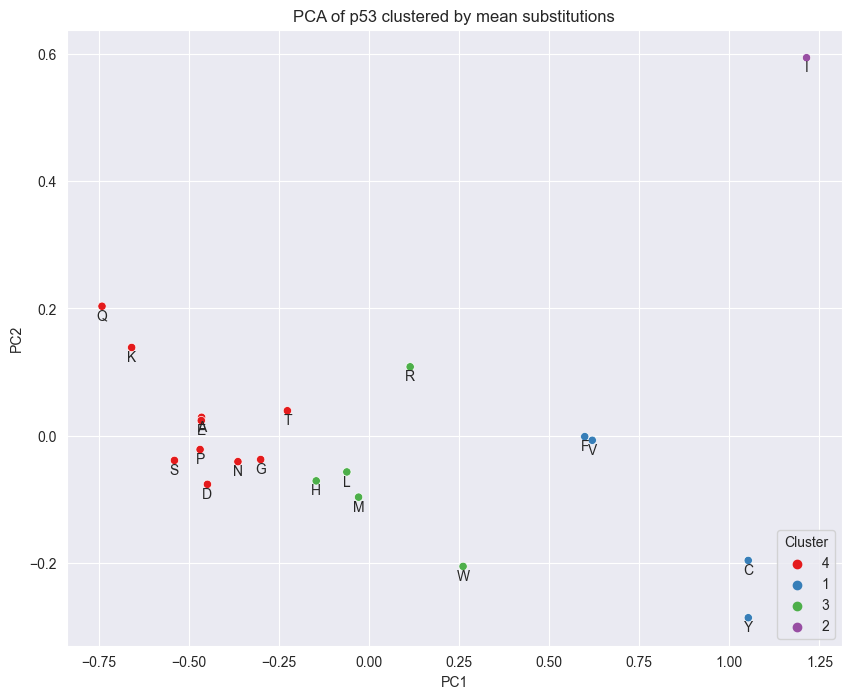

In [8]:
de.pca_hierarchical_plot(dist_chem, optimal_num_cluster= clusters_by_sil_chem, title = "AAs clustered by chemical properties")

de.pca_hierarchical_plot(dist_p53, optimal_num_cluster=clusters_by_sil_p53, title = "p53 clustered by distance matrix")
de.pca_hierarchical_plot(mean_subs_p53, optimal_num_cluster=4, title = "p53 clustered by mean substitutions")